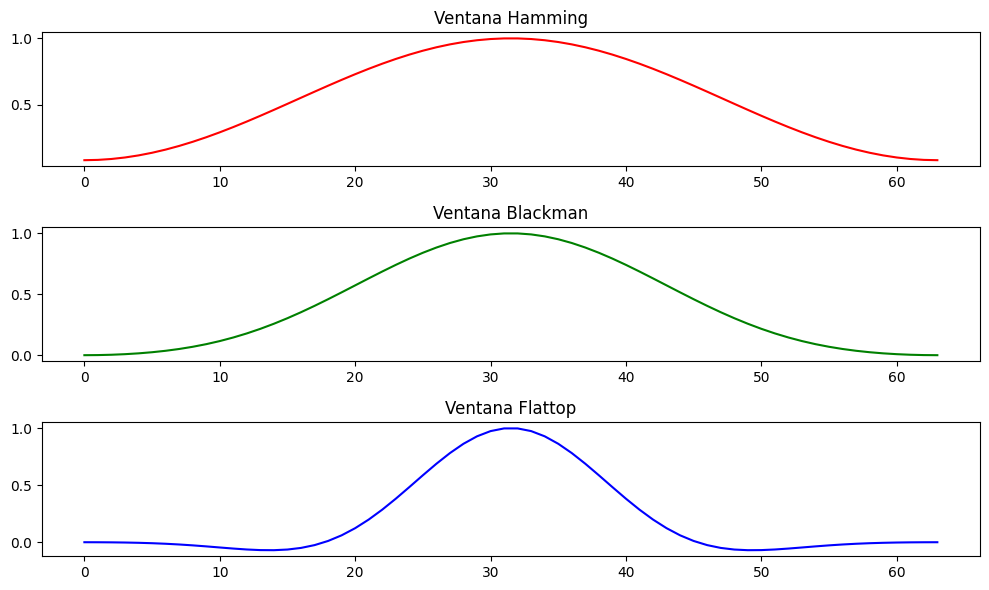

C:\Users\msere\AppData\Local\Temp\ipykernel_21848\2360696002.py:75: RuntimeWarning: divide by zero encountered in log10
  WdB = 20 * np.log10(np.abs(W) / np.max(np.abs(W)))  # magnitud en dB


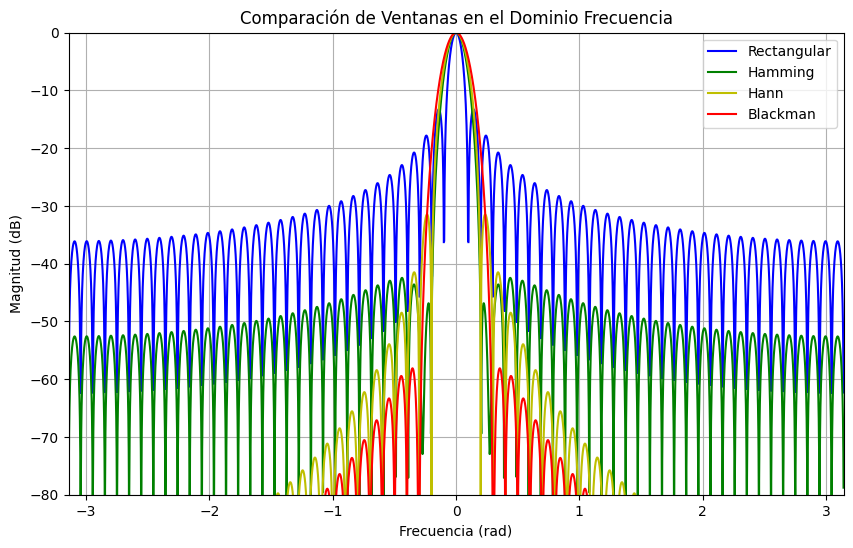

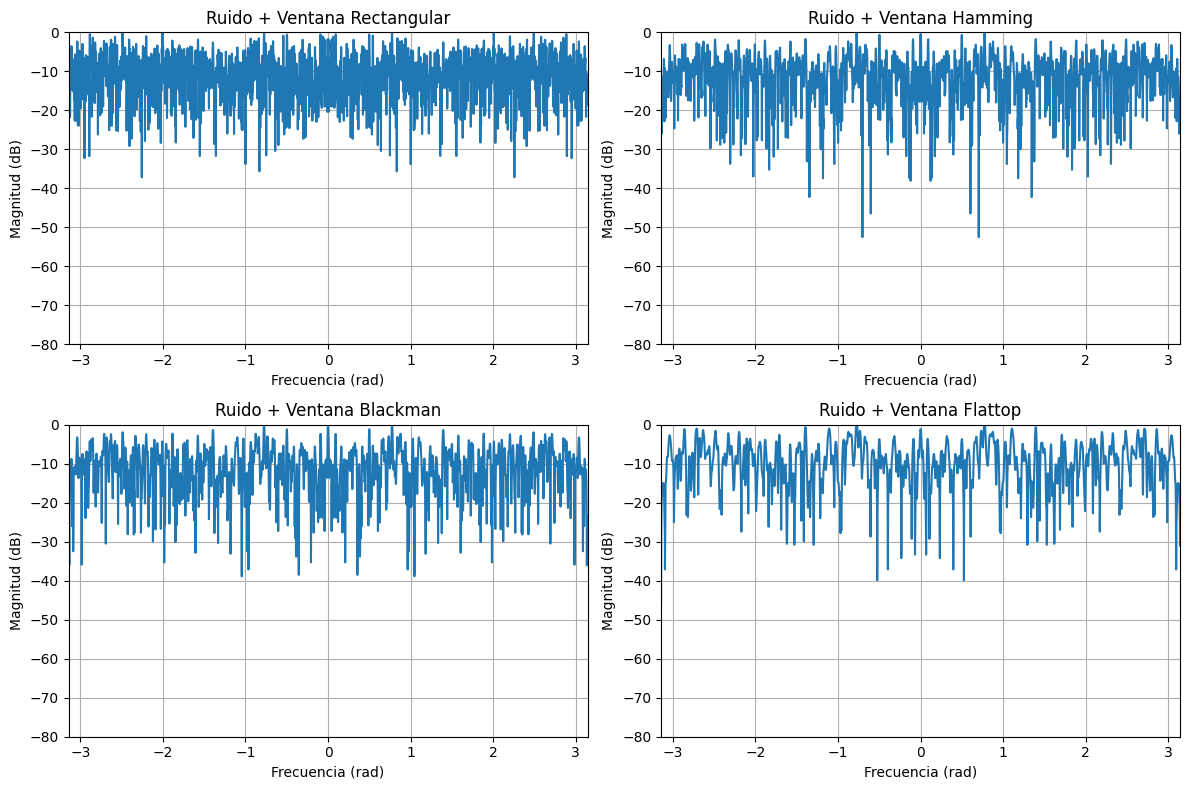

In [1]:
#VENTANAS
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import windows
#VENTANAS
#generar ventanas 3 o 4
#puedo elegir hammin, blackman, flattop

# -----------------------------
# Parámetros
# -----------------------------
N = 64   # longitud de la ventana

# -----------------------------
# Generar ventanas
# -----------------------------
ventana_hamming = windows.hamming(N)
ventana_blackman = windows.blackman(N)
ventana_flattop = windows.flattop(N)

# -----------------------------
# Graficar
# -----------------------------
plt.figure(figsize=(10,6))

plt.subplot(3,1,1)
plt.plot(ventana_hamming, 'r')
plt.title("Ventana Hamming")

plt.subplot(3,1,2)
plt.plot(ventana_blackman, 'g')
plt.title("Ventana Blackman")

plt.subplot(3,1,3)
plt.plot(ventana_flattop, 'b')
plt.title("Ventana Flattop")

plt.tight_layout()
plt.show()

#---------------------------------------------------------
#---------------------------------------------------------
#---------------------------------------------------------


#ploteo grafico parecido al holton

# -----------------------------
# Parámetros
# -----------------------------
N = 64          # longitud de la ventana
nfft = 4096     # puntos de la FFT (para más resolución)
ventanas = {
    "Rectangular": np.ones(N),
    "Hamming": windows.hamming(N),
    "Hann": windows.hann(N),
    "Blackman": windows.blackman(N)
}
colores = {
    "Rectangular": "b",
    "Hamming": "g",
    "Hann": "y",
    "Blackman": "r"
}

# -----------------------------
# Graficar espectros
# -----------------------------
plt.figure(figsize=(10,6))

for nombre, ventana in ventanas.items():
    # FFT normalizada
    W = np.fft.fft(ventana, nfft)
    W = np.fft.fftshift(W)  # centrar en 0
    WdB = 20 * np.log10(np.abs(W) / np.max(np.abs(W)))  # magnitud en dB
    
    # Frecuencia normalizada [-pi, pi]
    freqs = np.linspace(-np.pi, np.pi, nfft)
    
    plt.plot(freqs, WdB, colores[nombre], label=nombre)

plt.ylim([-80, 0])
plt.xlim([-np.pi, np.pi])
plt.xlabel("Frecuencia (rad)")
plt.ylabel("Magnitud (dB)")
plt.title("Comparación de Ventanas en el Dominio Frecuencia")
plt.legend()
plt.grid(True)
plt.show()


#---------------------------------------------------------
#---------------------------------------------------------
#---------------------------------------------------------


#ptos extras para llegar hacer un generador con piso de ruido y ventanear con ruido.


# -----------------------------
# Parámetros
# -----------------------------
N = 1024        # longitud de la señal
nfft = 4096     # puntos de la FFT
np.random.seed(0)  # para reproducibilidad

# Señal de ruido blanco gaussiano
ruido = np.random.randn(N)

# Ventanas disponibles
ventanas = {
    "Rectangular": np.ones(N),
    "Hamming": windows.hamming(N),
    "Blackman": windows.blackman(N),
    "Flattop": windows.flattop(N)
}

# -----------------------------
# Graficar espectro
# -----------------------------
plt.figure(figsize=(12,8))

for i, (nombre, ventana) in enumerate(ventanas.items(), 1):
    # Señal ventaneada
    señal_vent = ruido * ventana
    
    # FFT normalizada
    W = np.fft.fft(señal_vent, nfft)
    W = np.fft.fftshift(W)
    WdB = 20 * np.log10(np.abs(W) / np.max(np.abs(W)))
    
    # Eje de frecuencia
    freqs = np.linspace(-np.pi, np.pi, nfft)
    
    plt.subplot(2,2,i)
    plt.plot(freqs, WdB)
    plt.ylim([-80, 0])
    plt.xlim([-np.pi, np.pi])
    plt.title(f"Ruido + Ventana {nombre}")
    plt.xlabel("Frecuencia (rad)")
    plt.ylabel("Magnitud (dB)")
    plt.grid(True)

plt.tight_layout()
plt.show()